In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps

In [2]:
fastf1.Cache.enable_cache(r'D:\789\f1\season 2023\bach')  # replace with your cache directory

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Bahrain Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [3]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'PER' 'LEC' 'SAI' 'ALO' 'RUS' 'HAM' 'STR' 'OCO' 'HUL' 'NOR' 'BOT'
 'ZHO' 'TSU' 'ALB' 'SAR' 'MAG' 'PIA' 'DEV' 'GAS']


In [4]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [5]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [6]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:29.708000        0 days 00:00:00
1     PER 0 days 00:01:29.846000 0 days 00:00:00.138000
2     LEC        0 days 00:01:30 0 days 00:00:00.292000
3     SAI 0 days 00:01:30.154000 0 days 00:00:00.446000
4     ALO 0 days 00:01:30.336000 0 days 00:00:00.628000
5     RUS 0 days 00:01:30.340000 0 days 00:00:00.632000
6     HAM 0 days 00:01:30.384000 0 days 00:00:00.676000
7     STR 0 days 00:01:30.836000 0 days 00:00:01.128000
8     OCO 0 days 00:01:30.984000 0 days 00:00:01.276000
9     HUL 0 days 00:01:31.055000 0 days 00:00:01.347000
10    NOR 0 days 00:01:31.381000 0 days 00:00:01.673000
11    BOT 0 days 00:01:31.443000 0 days 00:00:01.735000
12    ALB 0 days 00:01:31.461000 0 days 00:00:01.753000
13    ZHO 0 days 00:01:31.473000 0 days 00:00:01.765000
14    SAR 0 days 00:01:31.652000 0 days 00:00:01.944000
15    MAG 0 days 00:01:31.892000 0 days 00:00:02.184000
16    PIA 0 days 00:01:32.101000 0 days 00:00:02

In [7]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

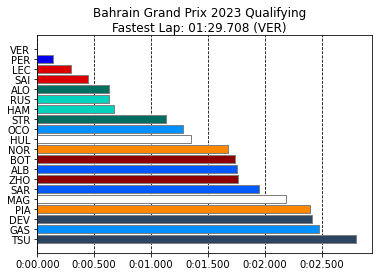

In [11]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")


# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

<Figure size 432x288 with 0 Axes>